In [34]:
import numpy as np
import pandas as pd

from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import roc_auc_score, accuracy_score, r2_score


import warnings
warnings.filterwarnings("ignore")


# Adaptive Boosting 

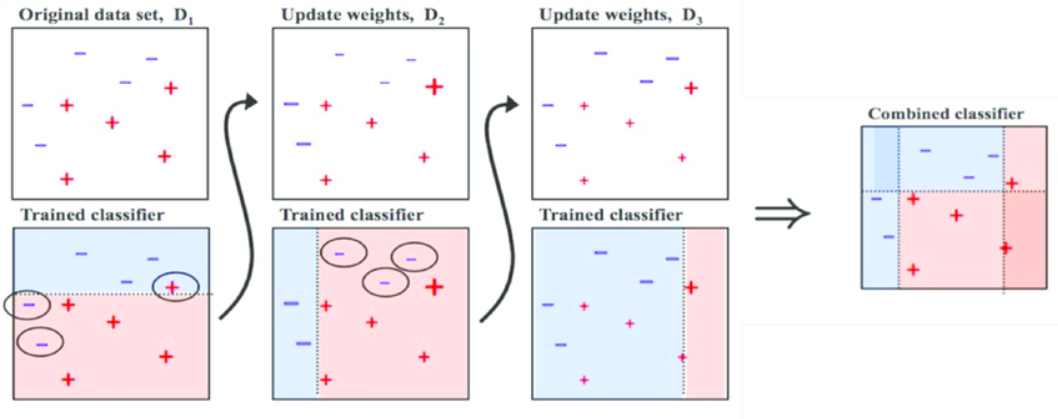

A **Decision Stump** is a simple decision tree model with only one split, making it a tree with a single decision node and two leaves.

### Key Points:
- **Single split** 
- **Weak learner** 
- **Quick and interpretable**

### Example:
If the feature is "age," a decision stump might split data with a rule like:
- **If age < 30** → Class 1
- **If age ≥ 30** → Class 2


---

## Adaptive Boosting - Classification

In [9]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Cases\Wisconsin\BreastCancer.csv', index_col=0)
df.head()

In [10]:
df.Class.value_counts()

X = df.drop(columns=['Class'], axis=1)
y = df['Class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)


### Adaptive Boosting with Decision Trees

In [24]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=24)
ada_br = AdaBoostClassifier(
    estimator=dtc,
    n_estimators=50,
    learning_rate=0.1,    
    random_state=24
)
ada_br.fit(X_train, y_train)
y_pred = ada_br.predict(X_test)  

ada_br.score(X_test, y_test), ada_br.get_params()


### Adaptive Boosting with Decision Trees and GreedSearchCV

In [28]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

ada_br = AdaBoostClassifier(
    estimator=dtc,
    random_state=24
)

params={
    'n_estimators': [10,50,100],
    'estimator__max_depth': [1,2,3],
}

gcv = GridSearchCV(
    estimator=ada_br, 
    param_grid=params, 
    cv=kfold, 
    scoring='neg_log_loss', 
    verbose=1
)

gcv.fit(X, y)

print(f"Best parameters: {gcv.best_params_}")
print(f"Best score: {gcv.best_score_}")


# Gradient Boosting Method

### Gradient Descent + Boosting

* Important parameteres
    - Number of trees (n_estimators)
    - Maximum Depth (max_depth) 
    - Learning Rate (learning_rate)

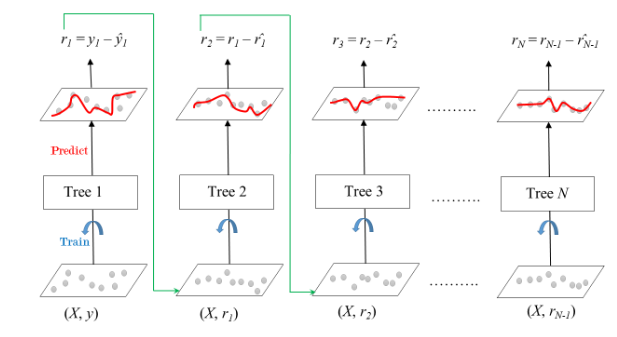

## Gradient Boosting  - Classification 

In [40]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

gbr = GradientBoostingClassifier(random_state=24)

params={
    'n_estimators': [10,50,100],
    'max_depth': [2,2,3],
    'learning_rate': np.linspace(0.001,1,5)
}               

gcv = GridSearchCV(
    estimator=gbr, 
    param_grid=params, 
    cv=kfold, 
    scoring='roc_auc',
    verbose=1
)

gcv.fit(X, y)

print(f"Best parameters: {gcv.best_params_}")
print(f"Best score: {gcv.best_score_}")

## Types of Gradient Boosting

* Gradient Boosting (GBM):

    - Extreme Gradient Boosting (XGBoost)
 
    - Cat Boost
 
    - Light GBM

### XGBoost

In [47]:
!pip install xgboost

In [56]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [58]:
label_encoder = LabelEncoder()
y_encod = label_encoder.fit_transform(y)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encod, test_size=0.2, random_state=24, stratify=y_encod)

In [63]:
xgbm = XGBClassifier(random_state=24)
xgbm.fit(X_train, y_train)
y_pred = xgbm.predict(X_test)
print(accuracy_score(y_test, y_pred))

with gridsearchcv

In [64]:
xgbm = XGBClassifier(random_state=24)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

params={
    'n_estimators': [10,50,100],
    'max_depth': [2,2,3],
    'learning_rate': np.linspace(0.001,1,5)
}               

gcv = GridSearchCV(
    estimator=xgbm, 
    param_grid=params, 
    cv=kfold, 
    scoring='roc_auc',
    verbose=1
)

gcv.fit(X, y_encod)

print(f"Best parameters: {gcv.best_params_}")
print(f"Best score: {gcv.best_score_}")


### Light GBM

In [73]:
!pip install lightgbm

In [74]:
from lightgbm import LGBMClassifier

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [78]:
lgbm = LGBMClassifier(learning_rate=0.1, depth=6, verbose=0)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

with gridsearchcv

In [79]:
lgbm = LGBMClassifier(random_state=24, verbose=0)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

params={
    'n_estimators': [10,50,100],
    'max_depth': [2,2,3],
    'learning_rate': np.linspace(0.001,1,5)
}               

gcv = GridSearchCV(
    estimator=lgbm, 
    param_grid=params, 
    cv=kfold, 
    scoring='roc_auc',
    verbose=1
)

gcv.fit(X, y_encod)

print(f"Best parameters: {gcv.best_params_}")
print(f"Best score: {gcv.best_score_}")


### Cat Boost

In [65]:
!pip install catboost

In [66]:
from catboost import CatBoostClassifier 

In [88]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Cases\human-resources-analytics\HR_comma_sep.csv')
X = df.drop('left', axis=1)
y = df['left']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

CatGBM dont require labelencoding or hot encoding for categorical features we can directly pass the categorical features to `cat_features` in  the CatGBM model

In [92]:
cgbm = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, cat_features=['Department', 'salary'])
cgbm.fit(X_train, y_train)
y_pred = cgbm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

with gridsearchcv

In [93]:
cgbm = CatBoostClassifier(random_state=24, verbose=0, cat_features=['Department', 'salary'])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

params={
    'n_estimators': [10,50,100],
    'max_depth': [2,2,3],
    'learning_rate': np.linspace(0.001,1,5)
}               

gcv = GridSearchCV(
    estimator=cgbm, 
    param_grid=params, 
    cv=kfold, 
    scoring='roc_auc',
    verbose=1
)

gcv.fit(X, y)

print(f"Best parameters: {gcv.best_params_}")
print(f"Best score: {gcv.best_score_}")


AdaBoost is like having a team of weak learners who work together to become strong. Imagine learning to identify dogs in photos:

1. First learner: Maybe just looks at ear shape
   - Gets some predictions right, some wrong

2. Second learner: Focuses extra hard on the images the first learner got wrong
   - Maybe looks at tail shape
   - Pays special attention to tricky cases

3. Third learner: Focuses even more on remaining difficult cases
   - Maybe looks at nose shape
   - Really concentrates on the hardest examples

Each new learner:
- Gives more attention to previously misclassified examples
- Gets weighted based on its accuracy
- Combines with others for the final decision

The key insight is: AdaBoost takes several "okay" learners and makes them work as a team, with each new learner focusing on fixing previous mistakes. It's like having multiple experts who each specialize in different aspects, working together to make better decisions.
 
 ---